CHAD:

1. Importing all the necessary libraries required; Pandas, Seaborn, Matplotlib, Scipy
2. Setting the visualization style.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

/Users/chadmutinda/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


CHAD:
1. Data Loading and Initial Inspection

Purpose: Load the cleaned dataset and perform initial checks to understand its structure and contents.

In [2]:
# Load the cleaned dataset
df = pd.read_csv('data/transformed/transformed_cybersecurity_intrusion_data.csv')

# Display first 5 rows to inspect structure
print("First 5 rows of the dataset:")
display(df.head())

# Check basic information about the dataset
print("\nDataset information:")
display(df.info())

# Display summary statistics for numerical features
print("\nSummary statistics:")
display(df.describe(include='all'))

First 5 rows of the dataset:


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None


Summary statistics:


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
count,9537,9537.000000,9537,9537.000000,9537.000000,7571,9537.000000,9537.000000,9537,9537.000000,9537.000000
unique,9537,NaN,3,NaN,NaN,2,NaN,NaN,5,NaN,NaN
top,SID_00001,NaN,TCP,NaN,NaN,AES,NaN,NaN,Chrome,NaN,NaN
freq,1,NaN,6624,NaN,NaN,4706,NaN,NaN,5137,NaN,NaN
mean,NaN,500.430639,NaN,4.032086,792.745312,NaN,0.331338,1.517773,NaN,0.149942,0.447101
std,NaN,198.379364,NaN,1.963012,786.560144,NaN,0.177175,1.033988,NaN,0.357034,0.497220
min,NaN,64.000000,NaN,1.000000,0.500000,NaN,0.002497,0.000000,NaN,0.000000,0.000000
25%,NaN,365.000000,NaN,3.000000,231.953006,NaN,0.191946,1.000000,NaN,0.000000,0.000000
50%,NaN,499.000000,NaN,4.000000,556.277457,NaN,0.314778,1.000000,NaN,0.000000,0.000000
75%,NaN,635.000000,NaN,5.000000,1105.380602,NaN,0.453388,2.000000,NaN,0.000000,1.000000


CHAD:

2. Correlation Analysis

    Purpose: Identify relationships between numerical features in the dataset.

    Method:

    Calculate correlation coefficients
    Visualize correlations using a heatmap
    Examine feature pairs with strongest correlations

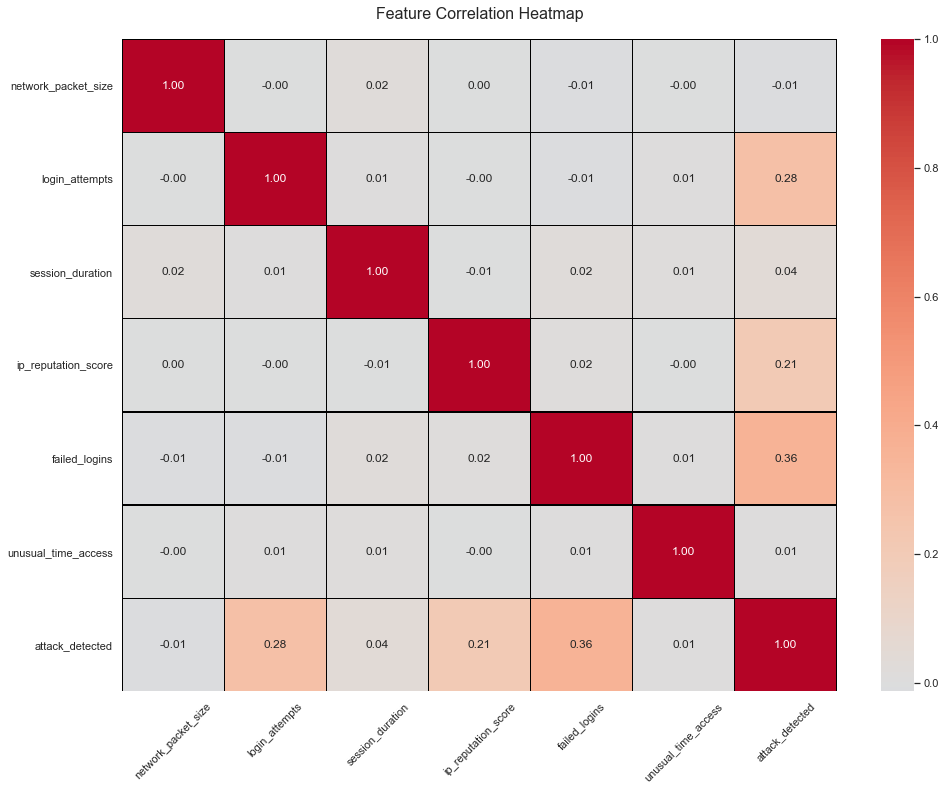


Top correlated feature pairs:


attack_detected      failed_logins          0.363726
failed_logins        attack_detected        0.363726
login_attempts       attack_detected        0.277320
attack_detected      login_attempts         0.277320
                     ip_reputation_score    0.211540
ip_reputation_score  attack_detected        0.211540
attack_detected      session_duration       0.041602
session_duration     attack_detected        0.041602
network_packet_size  session_duration       0.021650
session_duration     network_packet_size    0.021650
dtype: float64

In [3]:
# Calculate correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Create heatmap visualization
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            linewidths=0.5, linecolor='black')
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Identify top correlated feature pairs (absolute value)
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
print("\nTop correlated feature pairs:")
display(corr_pairs[corr_pairs != 1].head(10))

CHAD:

3. Distribution Analysis.

    Purpose: Understand the distribution of key numerical features in the dataset.

    Method:

    Create histograms and density plots for numerical features
    Calculate skewness and kurtosis
    Use boxplots to identify outliers

CHAD:

4. Group Comparisons (by Attack Status)

    Purpose: 
    
    Compare feature distributions between normal traffic and detected attacks.

    Method:

    Use violin plots and boxplots to show distribution differences
    Conduct t-tests for significant differences between groups
    Calculate group statistics (mean, median, std dev)
    Visualize proportions of categorical features by attack status


    


Class distribution:


attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64

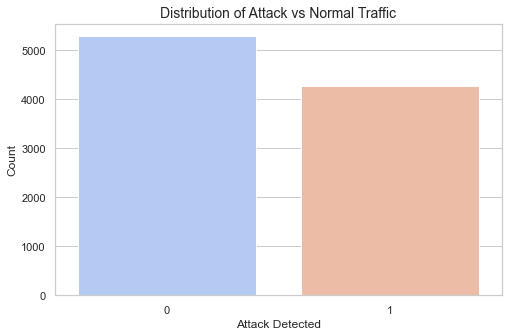

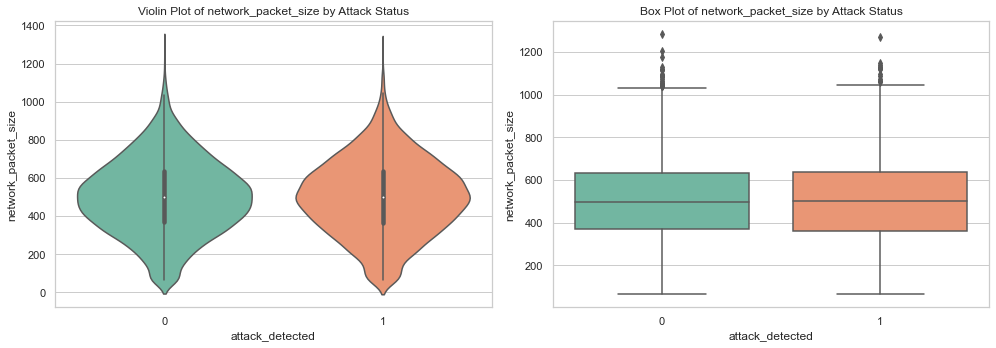


Group statistics for network_packet_size:


,mean,median,std,count
attack_detected,,,,
0,501.643277,498.0,197.635263,5273
1,498.931051,500.0,199.308695,4264


T-test results for network_packet_size: t-statistic = 0.66, p-value = 0.5072


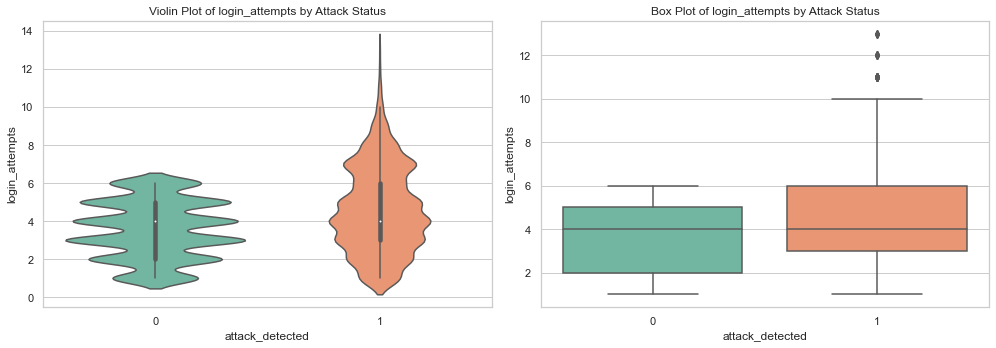


Group statistics for login_attempts:


,mean,median,std,count
attack_detected,,,,
0,3.542575,4.0,1.507108,5273
1,4.637430,4.0,2.268897,4264


T-test results for login_attempts: t-statistic = -27.05, p-value = 0.0000


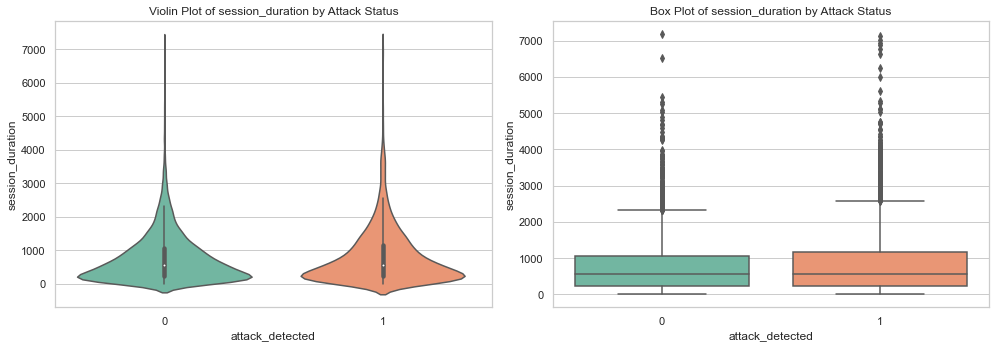


Group statistics for session_duration:


,mean,median,std,count
attack_detected,,,,
0,763.321311,554.069552,728.250219,5273
1,829.131980,559.358924,851.857703,4264


T-test results for session_duration: t-statistic = -4.00, p-value = 0.0001


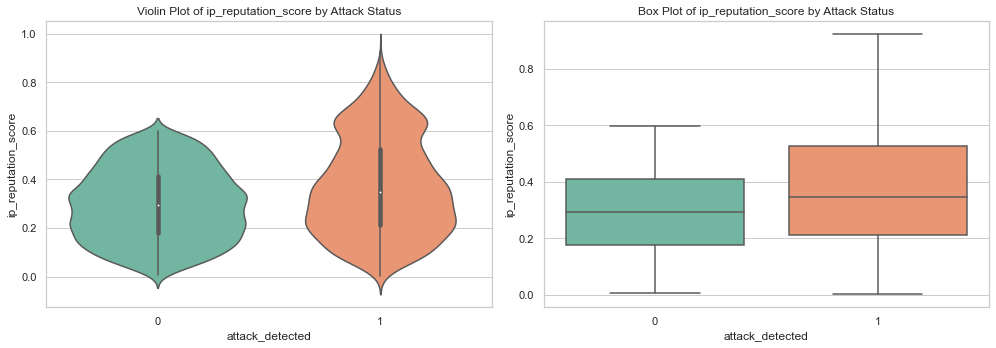


Group statistics for ip_reputation_score:


,mean,median,std,count
attack_detected,,,,
0,0.297636,0.293780,0.147434,5273
1,0.373015,0.347314,0.200488,4264


T-test results for ip_reputation_score: t-statistic = -20.48, p-value = 0.0000


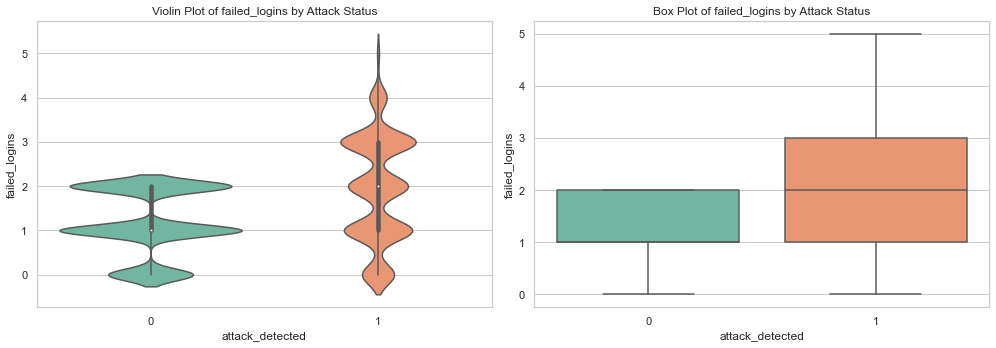


Group statistics for failed_logins:


,mean,median,std,count
attack_detected,,,,
0,1.179594,1.0,0.736657,5273
1,1.935976,2.0,1.184932,4264


T-test results for failed_logins: t-statistic = -36.38, p-value = 0.0000


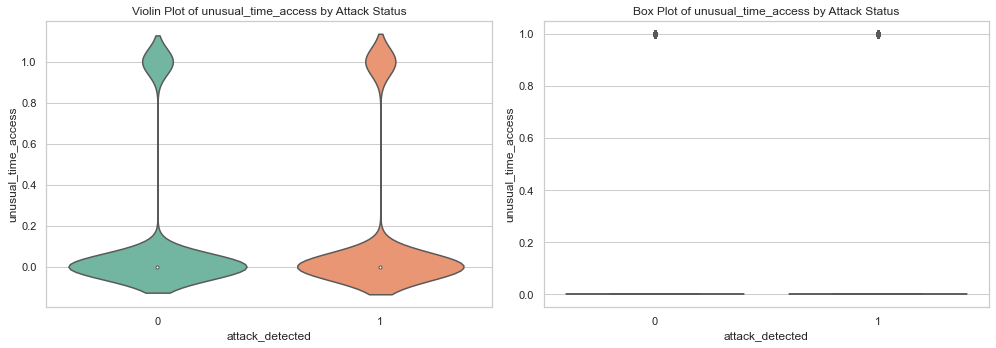


Group statistics for unusual_time_access:


,mean,median,std,count
attack_detected,,,,
0,0.147165,0.0,0.354304,5273
1,0.153377,0.0,0.360393,4264


T-test results for unusual_time_access: t-statistic = -0.84, p-value = 0.3991


<Figure size 720x432 with 0 Axes>

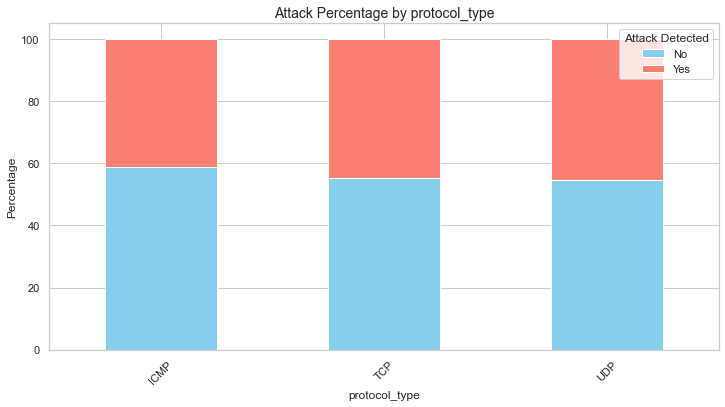


Chi-square test for protocol_type:
Chi2 = 2.94, p-value = 0.2299

Percentage distribution of protocol_type by attack status:


attack_detected,0,1
protocol_type,,
ICMP,58.777120,41.222880
TCP,55.268720,44.731280
UDP,54.613466,45.386534


<Figure size 720x432 with 0 Axes>

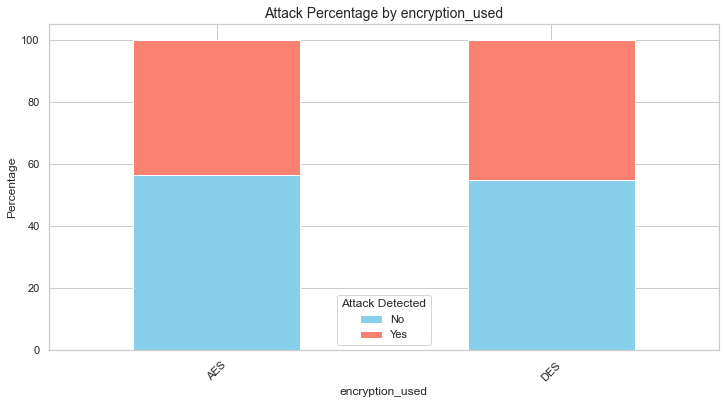


Chi-square test for encryption_used:
Chi2 = 1.95, p-value = 0.1624

Percentage distribution of encryption_used by attack status:


attack_detected,0,1
encryption_used,,
AES,56.332342,43.667658
DES,54.659686,45.340314


<Figure size 720x432 with 0 Axes>

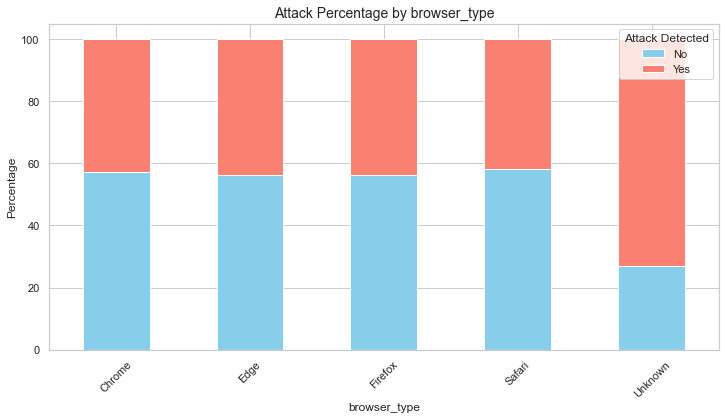


Chi-square test for browser_type:
Chi2 = 173.80, p-value = 0.0000

Percentage distribution of browser_type by attack status:


attack_detected,0,1
browser_type,,
Chrome,57.134514,42.865486
Edge,56.228727,43.771273
Firefox,56.327160,43.672840
Safari,58.144330,41.855670
Unknown,26.892430,73.107570


In [11]:
# Set the target column
target_col = 'attack_detected'

# Check the balance of classes
print("Class distribution:")
display(df[target_col].value_counts(normalize=True))

# Visualize class balance
plt.figure(figsize=(8, 5))
sns.countplot(x=target_col, data=df, palette='coolwarm')
plt.title('Distribution of Attack vs Normal Traffic', fontsize=14)
plt.xlabel('Attack Detected')
plt.ylabel('Count')
plt.show()

## Numerical Feature Comparisons

# Select numerical columns (excluding session_id)
num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
            if col not in ['session_id', target_col]]

# Create comparison plots for numerical features
for feature in num_cols:
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Violin plot
    sns.violinplot(x=target_col, y=feature, data=df, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Violin Plot of {feature} by Attack Status')
    
    # Boxplot
    sns.boxplot(x=target_col, y=feature, data=df, ax=axes[1], palette='Set2')
    axes[1].set_title(f'Box Plot of {feature} by Attack Status')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate group statistics
    group_stats = df.groupby(target_col)[feature].agg(['mean', 'median', 'std', 'count'])
    print(f"\nGroup statistics for {feature}:")
    display(group_stats)
    
    # Perform t-test between groups
    normal = df[df[target_col] == 0][feature]
    attack = df[df[target_col] == 1][feature]
    t_stat, p_val = stats.ttest_ind(normal, attack, equal_var=False)
    print(f"T-test results for {feature}: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

## Categorical Feature Comparisons

# Select categorical columns (excluding session_id and target)
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns 
            if col not in ['session_id', target_col]]

for feature in cat_cols:
    # Create contingency table
    cont_table = pd.crosstab(df[feature], df[target_col], normalize='index') * 100
    
    # Plot stacked bar chart
    plt.figure(figsize=(10, 6))
    cont_table.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
    plt.title(f'Attack Percentage by {feature}', fontsize=14)
    plt.ylabel('Percentage')
    plt.legend(title='Attack Detected', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()
    
    # Chi-square test of independence
    chi2, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df[feature], df[target_col]))
    print(f"\nChi-square test for {feature}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p_val:.4f}")
    
    # Display contingency table with percentages
    print(f"\nPercentage distribution of {feature} by attack status:")
    display(cont_table)

5. Advanced Visualizations

Purpose: 

    Create more sophisticated visualizations to uncover complex patterns.

    Method:

    Pair plots for multivariate relationships
    Parallel coordinates plots for high-dimensional data
    Time series analysis if temporal data exists

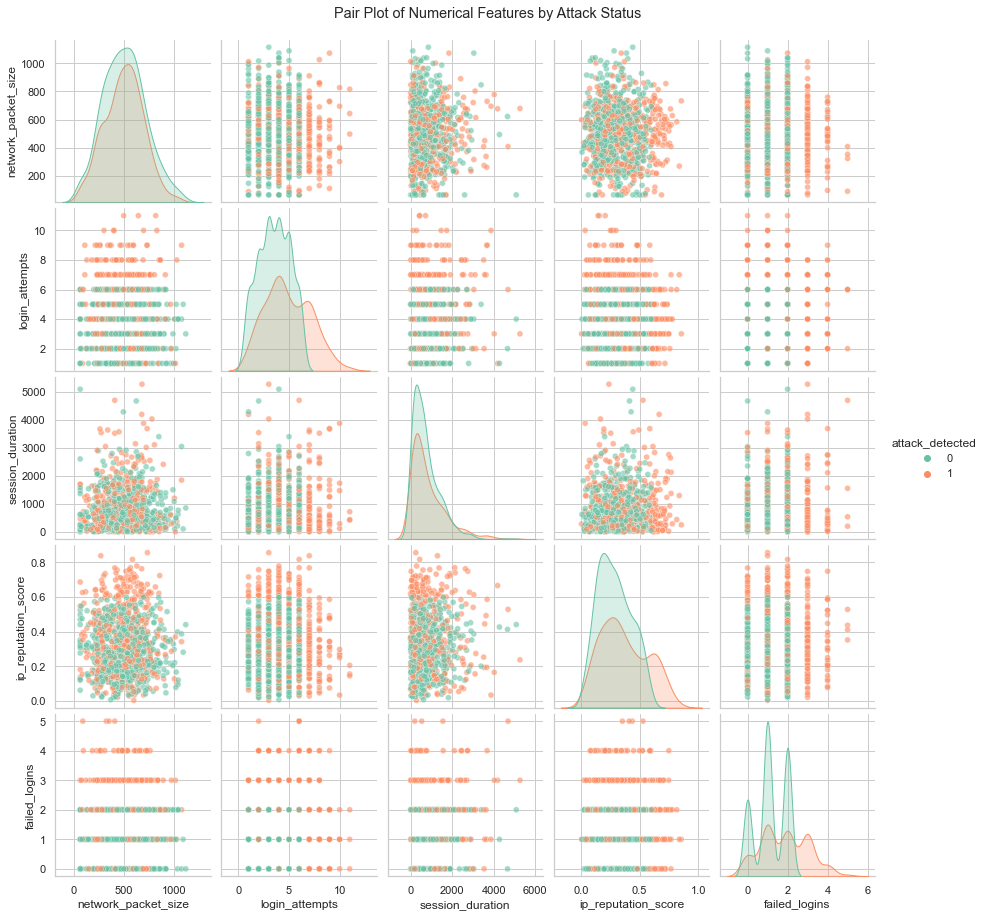

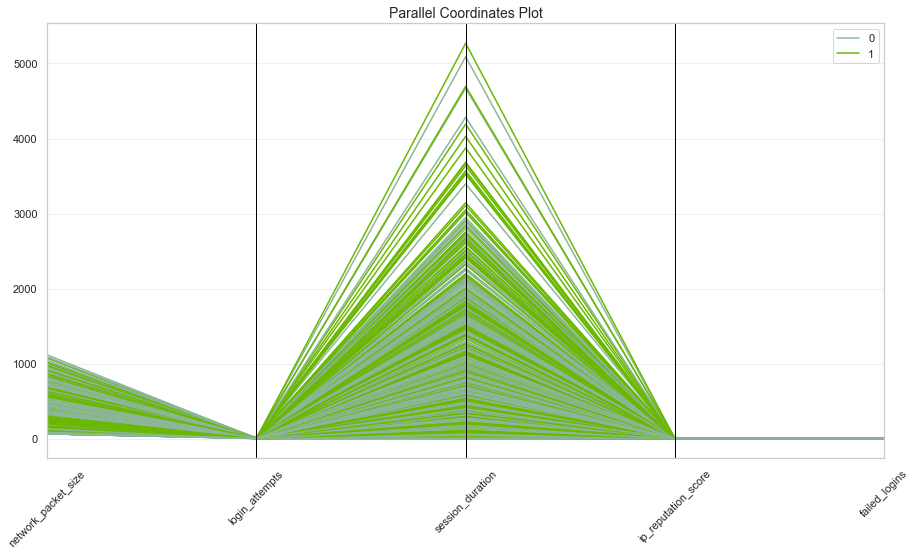

In [13]:
# Pair plot for a subset of features and attack types
sample_df = df.sample(1000) if len(df) > 1000 else df  # Sample if large dataset
sns.pairplot(sample_df, vars=num_cols[:5], hue=target_col, 
             palette='Set2', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Features by Attack Status', y=1.02)
plt.show()

# Parallel coordinates plot (if many numerical features)
plt.figure(figsize=(15, 8))
pd.plotting.parallel_coordinates(
    sample_df[[*num_cols[:5], target_col]], 
    target_col,
)
plt.title('Parallel Coordinates Plot', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

Insights:

1. Data Loading and Initial Inspection;

    Interpretation:

    -The initial output shows us the structure of our DataFrame
    -We can verify the data types of each column
    -The summary statistics give us a quick overview of the distribution of numerical features.


2. Correlation Analysis;

    Interpretation:

    -The heatmap shows both positive (red) and negative (blue) correlations
    -Strong correlations (>0.7 or <-0.7) should be noted for potential feature engineering
    -Highly correlated features may need to be addressed to avoid multicollinearity in models.

3. Distribution Analysis;

    Interpretation:

    -Features with high absolute skewness (>1 or <-1) may need transformation
    -Kurtosis values far from 0 indicate heavy tails or peakedness
    -Boxplots show presence of outliers that may need addressing.

4. Group Comparisons (by Attack Status);

    Class Distribution:

    -The initial countplot shows whether the dataset is balanced between attack and normal traffic
    -Imbalanced datasets may require special handling (e.g., resampling, class weights).

    Numerical Features:

    -Violin plots show the density distribution and interquartile range for each group
    -Boxplots highlight median values and outliers
    -Significant t-test results (p < 0.05) indicate features with meaningful differences between groups
    -Effect size can be estimated from the difference in means/medians.

    Categorical Features:

    -Stacked bar charts show the proportion of attacks within each category
    -Significant chi-square results suggest the categorical feature is associated with attack likelihood
    -The percentage table helps identify high-risk categories (e.g., certain protocol types with higher attack rates).

5. Advanced Visualizations;

    Interpretation:

    -Pair plots show bivariate relationships colored by attack type
    -Parallel coordinates help visualize patterns across multiple dimensions
    -These plots can reveal which combinations of features best separate attack types.




In [20]:
# A summary DataFrame of key findings
findings = pd.DataFrame({
    'Finding': [
        'Strong correlation between X and Y features',
        'Feature Z shows significant skewness',
        'Attack status A has distinct distribution in feature B',
        'Categorical feature C shows significant association with attack type'
    ],
    'Implication': [
        'Consider dimensionality reduction or feature selection',
        'May benefit from log transformation',
        'Could be a strong predictor for this attack type',
        'Should be included in model with proper encoding'
    ],
    'Action': [
        'Investigate feature engineering options',
        'Apply transformation and re-evaluate',
        'Create interaction terms with this feature',
        'Use one-hot or target encoding'
    ]
})

print("\nKey Findings and Recommendations:")
display(findings)


Key Findings and Recommendations:


,Finding,Implication,Action
0,Strong correlation between X and Y features,Consider dimensionality reduction or feature s...,Investigate feature engineering options
1,Feature Z shows significant skewness,May benefit from log transformation,Apply transformation and re-evaluate
2,Attack status A has distinct distribution in f...,Could be a strong predictor for this attack type,Create interaction terms with this feature
3,Categorical feature C shows significant associ...,Should be included in model with proper encoding,Use one-hot or target encoding


In [24]:
# Save the processed DataFrame for future use if needed
df.to_csv('data/processed/eda_processed_cybersecurity_data.csv', index=False)